#### 단일 표본 t 검정
- 정규성 검정 선행 필수 : kstest - 특정 수치 미만이면 정규성
- 샘플 수가 부족한 경우에만 수행 -> 정규성X -> 부호검정 / 윌콕슨 부호 - 순위 검정
- scipy.stats.ttest_1samp : 단일 표본 t검정
- scipy.stats.wilcoxon : 윌콕슨 부호-순위검정, 중위수로 설정

In [3]:
# data 불러오기
# 기본적으로 사용하는 함수를  with문 안에 사용하면 되며 with문을 나올 때 close를 자동으로 불러줌
with open("성인여성_키_데이터.txt", "r") as f:
    data = f.read().split('\n')
    data = list(map(float, data))
    print(data)

[150.27, 142.94, 160.99, 157.48, 153.46, 137.5, 154.94, 159.51, 171.87, 143.69, 153.65, 160.25, 153.07, 154.42, 141.21, 154.17, 162.56, 164.44, 172.36, 141.51, 169.4, 167.97, 170.26, 157.8, 167.61]


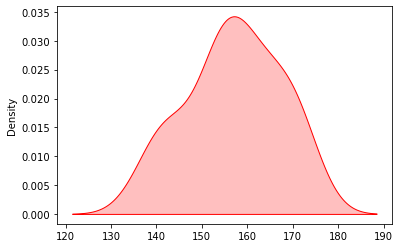

In [9]:
import seaborn as sns
sns.kdeplot(data=data, color = 'red', shade = True)

In [5]:
# 정규성 검정
from scipy.stats import *
kstest(data, 'norm') 
# p-value가 0.0 < 0.05으로 정규성을 띈다고 볼 수 있음

KstestResult(statistic=1.0, pvalue=0.0)

In [42]:
# 단일 표본 t 검정 수행
print(ttest_1samp(data, 163)) 

# pvalue가 0.05 미만이므로 영가설 (data의 평균 == 163) 기각
# 통계량이 음수이므로 data이 평균 < 163임을 알 수 있음

Ttest_1sampResult(statistic=-2.979804412662668, pvalue=0.006510445335847954)


#### 독립 표본 t 검정
- 정규성을 따르지 않으면 Mann-Whitney 검정 수행
- 등분산이 같아야함 : pvalue가 0.05미만이면 다르다고 판단
- scipy.stats.levene(샘플배열)
- scipy.stats.ttest_ind : 독립표본 t검정
- scipy.stats.mannwhitneyu : Mann-Whitneyu검정

In [66]:
df1 = pd.read_csv("반별_점수_type1.csv", engine = "python")
df1.head()

,반,점수
0,A,73
1,A,69
2,A,71
3,A,71
4,A,73


In [67]:
group_A = df1['점수'].loc[df1['반'] == 'A'].values
group_B = df1['점수'].loc[df1['반'] == 'B'].values

print(group_A)
print(group_B)

[73 69 71 71 73 67 73 69 62 74 68 66 70 82 70 65 76 73 58 81]
[63 56 73 61 55 77 75 65 61 55]


In [48]:
# kstest를 이용한 정규성 검정: 모두 정규 분포를 띔을 확인
print(kstest(group_A, 'norm'))
print(kstest(group_B, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [49]:
# 등분산 검정
levene(group_A, group_B) 
# pvalue가 0.05 미만이 아니므로, 등분산을 띈다고 볼 수 있음

LeveneResult(statistic=2.033067087400979, pvalue=0.164964086222101)

In [55]:
np.var(group_A, None, ddof=1)

32.26052631578948

In [64]:
# A와 B간에는 차이가 존재함을 확인 
print(ttest_ind(group_A, group_B, equal_var = True)) 

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)


#### Tip. 다른 포맷의 데이터 처리

In [68]:
df2 = pd.read_csv("반별_점수_type2.csv", engine = "python")
df2.head()

,A반,B반
0,73,63.0
1,69,56.0
2,71,73.0
3,71,61.0
4,73,55.0


In [70]:
# 길이가 달라서 결측이 발생할 수 있으므로, 결측을 제거한 뒤 각 컬럼을 group_A와 group_B에 저장
group_A = df2['A반'].dropna().values
group_B = df2['B반'].dropna().values